In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pylab as plt
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table,join

import matplotlib.patches as mpatches
from astropy.cosmology import WMAP9
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import matplotlib.patheffects as PathEffects
from astropy import constants
from matplotlib.patches import Rectangle
from matplotlib import colors


Creating the data as an array

In [2]:
FSL_lines  = np.array([('[CI] 610', 492.16065,  'GHz',  609.13537,  'um'),
                       ('[CI] 370', 809.34197,  'GHz',  370.41506,  'um'),
                       ('[NII] 205',1461.13141, 'GHz',  205.17830,  'um'),
                       ('[CII] 158',1900.53690, 'GHz',  157.74093,  'um'),
                       ('[OI] 145', 2060.06886, 'GHz',  145.52545,  'um'),
                       ('[NII] 122',2459.38010, 'GHz',  121.89757,  'um'),
                       ('[OIII] 88',3393.00624, 'GHz',  88.35600,   'um'),
                       ('[OI] 63'  ,4744.77,    'GHz',  63.18,      'um'),
                       ('[NIII] 57',5230.43,    'GHz',  57.32,      'um'),
                       ('[OIII] 52',5786.89659, 'GHz',  51.81450,   'um')],
                    dtype={'names'  :['Line','freq', 'freqUnit', 'wave','waveUnit'],
                           'formats':['|S10','float64','|S10','float64','|S10']})



In [3]:
def line_frequency(line_name):
    '''Given a line name returns the frequency of the line in GHz
    Possible line names include [CI] 610, [CI] 370,[NII] 205, [CII] 158, [OI] 145
    [NII] 122, [OIII] 88, [OI] 63, [OIII] 52'''
    line = np.where(FSL_lines['Line']==line_name)[0][0]
    return FSL_lines['freq'][line]




info on other axes:
data'x stellar radiation field age (in Myr) x metallicity (in solar units) x Log(ionization parameter) x  Log(initial hydrogen density) 
 
index          data
0              hden
1         abundance
2               age
3                IP
4       C  2 157.6m
5       O  1 63.17m
6       O  1 145.5m
7       N  2 121.7m
8       N  2 205.4m
9       N  3 57.21m
10       O  3 88.33m
11       O  3 51.80m
12       H  1  6563A
13       H  1  4861A
14       O  3  5007A
15       O  3  4959A
16       O  3  4931A
17       O II  3726A
18       O II  3729A
19       N  2  6584A
20       N  2  6548A
21       NE 3  3869A
22       NE 3  3968A
23       FIR  83.00m
24       F25  25.00m
25       F60  60.00m
26       F100 100.0m
27       HFFC     0 
28       HFFH     0 
29       FF H     0 
30       H FF     0 
31       NFNU 20.46c
32       NFNU 6.137c
33       NFNU 3.432c
34       NFNU 2.003c
35       NFNU 1.335c
36       NFNU  9993m
37       NFNU  6917m

One of the most widely used formats for astronomical images is the Flexible Image Transport System.
In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array.
FITS files also have headers which store metadata about the image.
FITS files are a standard format and astronomers have developed many libraries (in many programming languages)
that can read and write FITS files.

The following code shows how we can open a FITS file and print out its header information:

More information on Fits File, Dimension, Cards?

https://astronomy.stackexchange.com/questions/15029/why-do-we-use-fits-format-for-scientific-images-especially-in-astronomy-how-is?rq=1


In [4]:
cloudy_models_fits = fits.open('/Users/qe5106hi/Dropbox/ASTROPHYSICS/cloudymodelforcarl.fits')
cloudy_models = cloudy_models_fits[0].data

cloudy_models_fits.info() #looking into the fits file
cloudy_models_fits[0].header #looking into the headers



Filename: /Users/qe5106hi/Dropbox/ASTROPHYSICS/cloudymodelforcarl.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       9   (6, 7, 4, 6, 38)   float64   


SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                  -64 /                                                
NAXIS   =                    5 /                                                
NAXIS1  =                    6 /                                                
NAXIS2  =                    7 /                                                
NAXIS3  =                    4 /                                                
NAXIS4  =                    6 /                                                
NAXIS5  =                   38 /                                                
EXTEND  =                    T /Extensions may be present                       

In [5]:
np.shape(cloudy_models)

(38, 6, 4, 7, 6)


Opening a Fits file returned header/data units called HDU. For more information https://python4astronomers.github.io/astropy/fits.html

https://jwst-docs.stsci.edu/display/JDAT/Working+with+FITS+Files

???? What is the following code doing?

In [6]:
sed = np.concatenate([cloudy_models[23:27,:,:,:,:],cloudy_models[37:30:-1,:,:,:,:]],axis=0) #SED Stands For?
wavelength = [0.0083,0.0025,0.0060,0.0100,0.6917,0.9993,1.335,2.003,3.432,6.137,20.46]
frequency = 3e10/np.array(wavelength)

In [7]:
markers=['o','s','^','*','d','x']
colors = ['m','y','c','r','b','g','grey']
linestyles = ['-','--',':','-.','-','--',':']

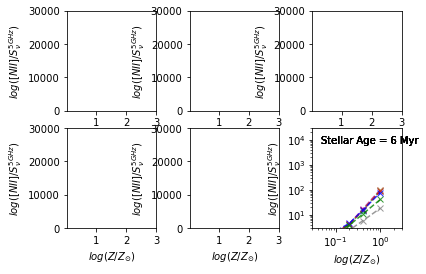

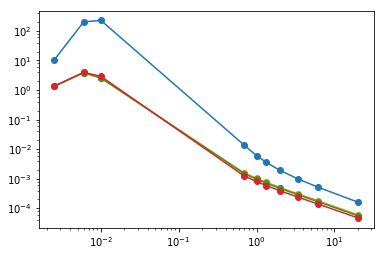

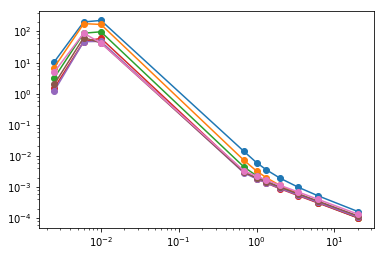

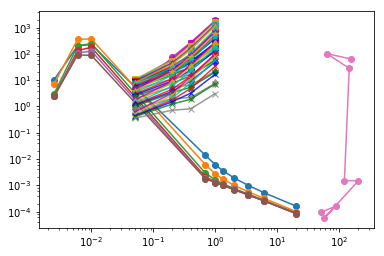

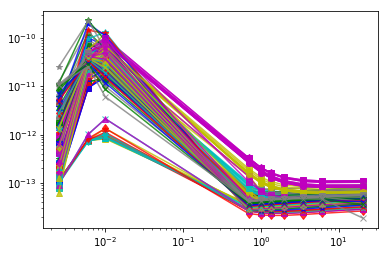

In [8]:
lines_IR = cloudy_models[4:12,:,:,:,:] #Taking 4:12 for first dimension and everything for rest?
lines_IR_names = ['[CII] 158', '[OI] 63', '[OI] 145', '[NII] 122', '[NII] 205', '[NIII] 57', '[OIII] 88', '[NII] 52' ]
line_wavelength = [157.6,63.17,145.5,121.7,205.4,57.21,88.33,51.80] #microns
#frequency = 3e10/np.array(wavelength)

hbeta = cloudy_models[13,:,:,:,:]
hbeta_wavelength = 0.4861 #microns

nii_205 = lines_IR[4,:,:,:,:]
nii = lines_IR[3,:,:,:,:]
oiii = lines_IR[6,:,:,:,:]
cii = lines_IR[0,:,:,:,:]
Snu_5ghz = sed[9,:,:,:,:]
Snu_8ghz = sed[8,:,:,:,:]
abundances = cloudy_models[1,0,:,0,0]
stellar_age = cloudy_models[2,:,0,0,0]
densities = cloudy_models[0,0,0,0,:]
ionization_param = cloudy_models[3,0,0,:,0]
nii_5GHz = nii/Snu_5ghz
oiii_5GHz = oiii/Snu_5ghz
cii_5GHz = cii/Snu_5ghz
nii_205_5GHz = nii_205/Snu_5ghz

plt.figure(1)
plt.loglog(wavelength[1:],sed[1:,0,0,0,0]/frequency[1:],'o-')

plt.figure(2)
plt.loglog(wavelength[1:],sed[1:,0,:,0,0],'o-')

plt.figure(3)
plt.loglog(wavelength[1:],sed[1:,0,0,:,0],'o-')

plt.figure(4)
plt.loglog(wavelength[1:],sed[1:,0,0,0,:],'o-')

plt.figure(5)
#info on other axes:
#'data'x stellar radiation field age (in Myr) x metallicity (in solar units) x Log(ionization parameter) x  Log(initial hydrogen density) 
 
#index          data
# 0              hden
# 1         abundance
# 2               age
# 3                IP


for age in np.arange(len(sed[0,:,0,0,0])):
    for metallicity in np.arange(len(sed[0,0,:,0,0])):
        plt.loglog(wavelength[1:],sed[1:,age,metallicity,0,0]/frequency[1:],marker=markers[age], #log scaling on both x and y scales
                   linestyle='-',alpha=0.8,color=colors[metallicity])

for age in np.arange(len(sed[0,:,0,0,0])):
    for ionization in np.arange(len(sed[0,0,0,:,0])):
        plt.loglog(wavelength[1:],sed[1:,age,0,ionization,0]/frequency[1:],marker=markers[age],
                   linestyle='-',alpha=0.8,color=colors[ionization])

for metallicity in np.arange(len(sed[0,0,:,0,0])):
    for ionization in np.arange(len(sed[0,0,0,:,0])):
        plt.loglog(wavelength[1:],sed[1:,5,metallicity,ionization,0]/frequency[1:],marker=markers[metallicity],
                   linestyle='-',alpha=0.8,color=colors[ionization])

for density in np.arange(len(sed[0,0,0,0,:])):
    for ionization in np.arange(len(sed[0,0,0,:,0])):
        plt.loglog(wavelength[1:],sed[1:,5,0,ionization,density]/frequency[1:],marker=markers[density],
                   linestyle='-',alpha=0.8,color=colors[ionization])



# 4       C  2 157.6m
# 5       O  1 63.17m
# 6       O  1 145.5m
# 7       N  2 121.7m
# 8       N  2 205.4m
# 9       N  3 57.21m
#10       O  3 88.33m
#11       O  3 51.80m



plt.figure(4)
plt.loglog(line_wavelength,lines_IR[:,0,0,0,0],'o-')

for density in np.arange(len(densities)):
    for ionization in np.arange(len(ionization_param)):
        plt.loglog(abundances,nii_5GHz[1,:,ionization,density],marker=markers[density],
                   linestyle='-',alpha=0.8,color=colors[ionization])

#plot models for all ages, metalicities, ionization
dens = 5
fig = plt.figure(1,figsize=(9,4))
fig.subplots_adjust(hspace=.175,wspace=.375)
for age in np.arange(len(stellar_age)):
    figure_number = age +1
    ax1 = plt.subplot(2,3,figure_number)
    ax1.set_ylabel(r'$log([NII]/S_{\nu}^{5 GHz})$')
    ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
    plt.xlim(3e-2,3e0)
    plt.ylim(3e0,3e4)
for ionization in np.arange(len(ionization_param)):
    ax1.loglog(abundances,nii_5GHz[age,:,ionization,dens],marker=markers[age],
                linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
    ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')

plt.savefig('/Users/qe5106hi/Dropbox/ASTROPHYSICS/cloudy_nii_5ghz.png' %densities[dens],dpi=300,bbox_inches='tight',pad_inches=0.5)




In [9]:
ionization_param

array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. ])

In [10]:
densities

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5])

In [ ]:
#plot models for all ages, metalicities, ionization
dens = 5
fig = plt.figure(1,figsize=(9,4))
fig.subplots_adjust(hspace=.175,wspace=.375)
for age in np.arange(len(stellar_age)):
    figure_number = age +1
    ax1 = plt.subplot(2,3,figure_number)
    ax1.set_ylabel(r'$log([NII]/S_{\nu}^{5 GHz})$')
    ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
    plt.xlim(3e-2,3e0)
    plt.ylim(3e0,3e4)
    for ionization in np.arange(len(ionization_param)):
        ax1.loglog(abundances,nii_5GHz[age,:,ionization,dens],marker=markers[age],
                   linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
        ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')
plt.savefig("cloudy_nii_5ghz_hden%f.png")

#plot nii relative flux for all ages, metalicities, ionization
dens = 5
fig = plt.figure(1,figsize=(9,4))
fig.subplots_adjust(hspace=.175,wspace=.375)
for age in np.arange(len(stellar_age)):
    figure_number = age +1
    ax1 = plt.subplot(2,3,figure_number)
    ax1.set_ylabel(r'$log([NII]/H\beta)$')
    ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
    plt.xlim(3e-2,3e0)
    plt.ylim(1e-4,1e0)
    for ionization in np.arange(len(ionization_param)):
        ax1.loglog(abundances,nii[age,:,ionization,dens],marker=markers[age],
                   linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
        ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')

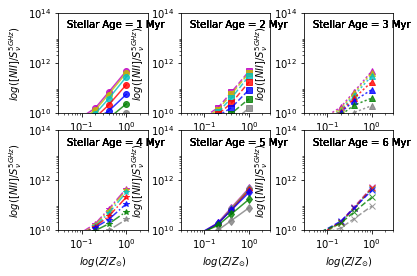

In [17]:
#Divide by the frequency of the continuum points to have the line to ratio in the observal units of [Hz]              
###################
for dens in np.arange(len(densities)):
    fig = plt.figure(1,figsize=(9,4))
    fig.clf() #clears the current figure
    fig.subplots_adjust(hspace=.175,wspace=.375)
    for age in np.arange(len(stellar_age)):
        figure_number = age +1
        ax1 = plt.subplot(2,3,figure_number)
        ax1.set_ylabel(r'$log([NII]/S_{\nu}^{5 GHz})$')
        ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
        plt.xlim(3e-2,3e0)
        plt.ylim(1e10,1e14)
        for ionization in np.arange(len(ionization_param)):
            ax1.loglog(abundances,nii_5GHz[age,:,ionization,dens]*frequency[9],marker=markers[age],
                       linestyle=linestyles[age],alpha=0.8,color=colors[ionization])
            ax1.annotate("Stellar Age = %i Myr" %stellar_age[age],(0.1,0.85),xycoords='axes fraction')
plt.show()
    
plt.savefig('cloudy_nii_5ghz_HertzUNITS_hden%f.png' %densities[dens],dpi=300,bbox_inches='tight',pad_inches=0.5)
    


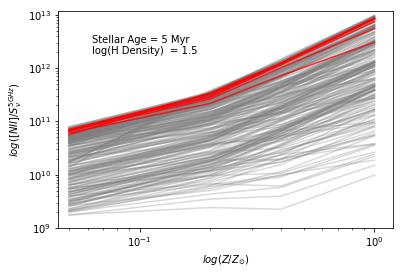

In [18]:
#Single Plot of All Models
###################
#Divide by the frequency of the continuum points to have the line to ratio in the observal units of [Hz]              
###################
fig = plt.figure(1,figsize=(6,4))
fig.clf()
ax1 = plt.subplot(111)
ax1.set_ylabel(r'$log([NII]/S_{\nu}^{5 GHz})$')
ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
plt.xlim(4.5e-2,1.2e0)
plt.ylim(1e9,1.2e13)

key_dens = 1 #
key_age = 4 #5 mega year
ax1.annotate("Stellar Age = %i Myr" %stellar_age[key_age],(0.1,0.85),xycoords='axes fraction')
ax1.annotate(r"log(H Density)  = %.1f" %densities[key_dens],(0.1,0.80),xycoords='axes fraction')
for dens in np.array([0,2,3,4,5,1]):
    for age in np.array([0,1,2,3,5,4]):
        for ionization in np.arange(len(ionization_param)):
            if dens == key_dens and age == key_age:
                line_color = 'red'
                alphas = 0.8
            else:
                line_color = 'grey'
                alphas = 0.3
            ax1.loglog(abundances,nii_5GHz[age,:,ionization,dens]*frequency[9],marker=None,
                       linestyle='-',alpha=alphas,color=line_color)

    
plt.show()

In [1]:
###################
#Plot all models and over plot the observed data              
###################
for key_dens in np.arange(len(densities)):
    for key_age in np.arange(len(stellar_age)):
        #print key_dens, key_age
        fig = plt.figure(1,figsize=(6,4))
        fig.clf()
        ax1 = plt.subplot(111)
        ax1.set_ylabel(r'$log([NII]/S_{\nu}^{5 GHz})$')
        ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
        plt.xlim(-1.6,0.75)
        plt.ylim(9.0,13.1)
        #key_dens = 3 #
        #key_age = 2 #5 mega year
        ax1.annotate("Stellar Age = %i Myr" %stellar_age[key_age],(0.1,0.85),xycoords='axes fraction')
        ax1.annotate(r"log(H Density)  = %.1f" %densities[key_dens],(0.1,0.80),xycoords='axes fraction')
        for dens in  np.arange(len(densities)):
            for age in np.arange(len(stellar_age)):
                for ionization in np.arange(len(ionization_param)):
                    if dens == key_dens and age == key_age:
                        line_color = 'red'
                        alphas = 0.9
                        zorder = -5
                        linewidths = 3
                    else:
                        line_color = 'grey'
                        alphas = 0.3
                        zorder = -10
                        linewidths = 1
                    ax1.plot(np.log10(abundances),np.log10(nii_5GHz[age,:,ionization,dens]*frequency[9]),marker=None,
                               linestyle='-',alpha=alphas,color=line_color,zorder=-10,linewidth=linewidths)
        
        #plot the read data    
        ydata = ma.array(np.log10((nii_data/ff).data.value*10.0**29),mask=(nii_data/ff).mask)
        xdata = abundance_data
        zdata = ma.array(np.log10((oiii_data/nii_data).data.value),mask=(oiii_data/nii_data).mask)
        
        #cmap = plt.cm.jet
        #norm = colors.Normalize(zdata.min(),zdata.max())
        #ec_colors = plt.cm.jet(norm(zdata))
        
        
        yerr_linear = np.sqrt((ERRnii/nii_data).data.value**2+(ERRff/ff).data.value**2)*(nii_data/ff).data.value*10.0**29
        yerr_log_pos,yerr_log_neg=linear_to_log_errors_log_data(ydata,yerr_linear)
        yerr_log_pos.mask = ydata.mask
        yerr_log_neg.mask = ydata.mask
        yuplims = ULnii
        
        yerr=np.vstack([yerr_log_neg,yerr_log_pos])
        yerr.mask=yuplims
        xerr = ERRmetallicity
        
        ax1.scatter(xdata,ydata,s=40,c=zdata,cmap='jet',alpha=0.7,zorder=1.0,linewidth=0.5)
        ax1.errorbar(xdata,ydata,xerr=xerr,yerr=yerr,lolims=yuplims,
                     ecolor='k',elinewidth=1,capthick=1,fmt=None,zorder=-1.0,alpha=0.5)
plt.show()

NameError: name 'np' is not defined

In [22]:
#Plot all models and over plot the observed data   for NII, OIII and CII           
###################
#-----------------------------------------------------------------------------#


#plt.setp([a.get_xticklabels() for a in axes[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in axes[:, 1]], visible=False)

from matplotlib.patches import Rectangle


key_color = 'red'
key_alpha = 0.9
key_zorder = -5
key_lindwidths = 2
else_color = 'grey'
else_alpha = 0.1
else_zorder = -10
else_linewidth = 1
ff_fraction = 0.3
#IP_colors = ['maroon','red','orange','yellow','lime','cyan','blue']
IP_colors = ['blue','cyan','lime','yellow','orange','red','maroon']
#for key_dens in np.arange(1):
#    for key_age in np.arange(1):
for key_dens in np.arange(len(densities)):
    for key_age in np.arange(len(stellar_age)):
        fig.clf()
        fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(6,8.75),dpi=150)
        fig.subplots_adjust(hspace=.175,wspace=.375)


#        print key_dens, key_age
#        fig = plt.figure(1,figsize=(6,4))
#        fig.clf()
#        ax1 = plt.subplot(111)
#        ax1.set_ylabel(r'$log([NII]/S_{\nu}^{5 GHz})$')
#        ax1.set_xlabel(r'$log(Z/Z_{\odot})$')
#        plt.xlim(-1.6,0.75)
#        plt.ylim(9.0,13.1)
#----------------NII/FF versus Metalicity ------------------------------------#
        axes[0,0].set_ylabel(r'$log([NII]/S_{\nu}^{ff})$')
        axes[0,0].set_xlabel(r'$log(Z/Z_{\odot})$')
#Models
        axes[0,0].annotate("Stellar Age = %i Myr" %stellar_age[key_age],(0.5,0.92),xycoords='axes fraction',horizontalalignment='center',weight='bold',zorder=10)
        axes[0,0].annotate(r"$log($H Density$)$  = %.1f" %densities[key_dens],(0.5,0.85),xycoords='axes fraction',horizontalalignment='center',weight='bold',zorder=10)
        for dens in  np.arange(len(densities)):
            for age in np.arange(len(stellar_age)):
                for ionization in np.arange(len(ionization_param)):
                    if dens == key_dens and age == key_age:
                        line_color = IP_colors[ionization]
                        alphas = key_alpha
                        zorders = key_zorder
                        linewidths = key_lindwidths
                        labels= "%.1f" %ionization_param[ionization]
                    else:
                        line_color = else_color
                        alphas = else_alpha
                        zorders = else_zorder
                        linewidths = else_linewidth
                        labels=None
                    axes[0,0].plot(np.log10(abundances),np.log10(nii_5GHz[age,:,ionization,dens]*frequency[9]),marker=None,
                               linestyle='-',alpha=alphas,color=line_color,zorder=zorders,linewidth=linewidths,label=labels)
                               

#Data       
        ydata = ma.array(np.log10((Nii_data/ff/ff_fraction).data.value*10.0**29),mask=(Nii_data/ff).mask)
        xdata = abundance_data
        zdata = ma.array(np.log10((oiii/Nii_data).data.value),mask=(oiii/Nii_data).mask)
        
        yerr_linear = np.sqrt((ERRnii/Nii_data).data.value**2+(ERRff/ff).data.value**2)*(Nii_data/ff/ff_fraction).data.value*10.0**29
        yerr_log_pos,yerr_log_neg=linear_to_log_errors_log_data(ydata,yerr_linear)
        yuplims = ULnii
        #yerr_log_pos.mask = yuplims
        #yerr_log_neg.mask = yuplims
        where_UL=np.where(yuplims==1.0)[0]
        yerr_log_pos[where_UL]=0
        
        axes[0,0].scatter(xdata,ydata,s=40,c=zdata,cmap='jet',alpha=0.7,zorder=1.0,linewidth=0.5)
        axes[0,0].errorbar(xdata,ydata,xerr=xerr,yerr=yerr,lolims=yuplims,
                     ecolor='k',elinewidth=1,capthick=1,fmt=None,zorder=-1.0,alpha=0.5)
        l = axes[0,0].legend(loc='upper center',bbox_to_anchor = (0.5,0.86),ncol=3, fontsize = 8,handletextpad=0.5,columnspacing=0.5,
                        borderpad = 0.5, labelspacing = 0.5,frameon=False,title=r'$log(U)$')
        l.set_zorder(10)
        rectangle = Rectangle((-1.1,12.8), 1.7, 1.12, facecolor='white', edgecolor='black',zorder=9,linewidth=1.5)
        axes[0,0].add_artist(rectangle)
        rectangle.set_clip_box(axes[0,0].bbox)

#----------------OIII/FF versus Metalicity ------------------------------------#
#        axes[0,0].annotate("Stellar Age = %i Myr" %stellar_age[key_age],(0.1,0.85),xycoords='axes fraction')
#        axes[0,0].annotate(r"log(H Density)  = %.1f" %densities[key_dens],(0.1,0.80),xycoords='axes fraction')
        axes[0,1].set_ylabel(r'$log([OIII]/S_{\nu}^{ff})$')
        axes[0,1].set_xlabel(r'$log(Z/Z_{\odot})$')
#Models        
        for dens in  np.arange(len(densities)):
            for age in np.arange(len(stellar_age)):
                for ionization in np.arange(len(ionization_param)):
                    if dens == key_dens and age == key_age:
                        line_color = IP_colors[ionization]
                        alphas = key_alpha
                        zorders = key_zorder
                        linewidths = key_lindwidths
                        labels= "%.1f" %ionization_param[ionization]
                    else:
                        line_color = else_color
                        alphas = else_alpha
                        zorders = else_zorder
                        linewidths = else_linewidth
                        labels=None
                    axes[0,1].plot(np.log10(abundances),np.log10(oiii_5GHz[age,:,ionization,dens]*frequency[9]),marker=None,
                               linestyle='-',alpha=alphas,color=line_color,zorder=zorders,linewidth=linewidths,label=labels)
  
#Data        

        
        ydata = ma.array(np.log10((oiii/ff/ff_fraction).data.value*10.0**29),mask=(Nii_data/ff).mask)
        xdata = abundance_data
        zdata = ma.array(np.log10((oiii/Nii_data).data.value),mask=(oiii_data/Nii_data).mask)
        
        yerr_linear = np.sqrt((ERRoiii/oiii).data.value**2+(ERRff/ff).data.value**2)*(oiii/ff/ff_fraction).data.value*10.0**29
        yerr_log_pos,yerr_log_neg=linear_to_log_errors_log_data(ydata,yerr_linear)
        yuplims = ULoiii
        #yerr_log_pos.mask = yuplims
        #yerr_log_neg.mask = yuplims
        where_UL=np.where(yuplims==1.0)[0]
        yerr_log_pos[where_UL]=0        
        xerr = ERRmetallicity
        
        axes[0,1].scatter(xdata,ydata,s=40,c=zdata,cmap='jet',alpha=0.7,zorder=1.0,linewidth=0.5)
        axes[0,1].errorbar(xdata,ydata,xerr=xerr,yerr=[yerr_log_neg,yerr_log_pos],lolims=yuplims,
                     ecolor='k',elinewidth=1,capthick=1,fmt=None,zorder=-1.0,alpha=0.5)
             




#----------------CII/FF versus Metalicity ------------------------------------#
        axes[1,0].set_ylabel(r'$log([CII]/S_{\nu}^{ff})$')
        axes[1,0].set_xlabel(r'$log(Z/Z_{\odot})$')
#Models        
        for dens in  np.arange(len(densities)):
            for age in np.arange(len(stellar_age)):
                for ionization in np.arange(len(ionization_param)):
                    if dens == key_dens and age == key_age:
                        line_color = IP_colors[ionization]
                        alphas = key_alpha
                        zorders = key_zorder
                        linewidths = key_lindwidths
                        labels= "%.1f" %ionization_param[ionization]
                    else:
                        line_color = else_color
                        alphas = else_alpha
                        zorders = else_zorder
                        linewidths = else_linewidth
                        labels=None
                    axes[1,0].plot(np.log10(abundances),np.log10(cii_5GHz[age,:,ionization,dens]*frequency[9]),marker=None,
                               linestyle='-',alpha=alphas,color=line_color,zorder=zorders,linewidth=linewidths,label=labels)
#Data
        ydata = ma.array(np.log10((cii_data/ff/ff_fraction).data.value*10.0**29),mask=(nii_data/ff).mask)
        xdata = abundance_data
        zdata = ma.array(np.log10((oiii_data/nii_data).data.value),mask=(oiii_data/nii_data).mask)
        
        yerr_linear = np.sqrt((ERRcii/cii_data).data.value**2+(ERRff/ff).data.value**2)*(cii_data/ff/ff_fraction).data.value*10.0**29
        yerr_log_pos,yerr_log_neg=linear_to_log_errors_log_data(ydata,yerr_linear)
        yuplims = ULcii
        #yerr_log_pos.mask = yuplims
        #yerr_log_neg.mask = yuplims
        where_UL=np.where(yuplims==1.0)[0]
        yerr_log_pos[where_UL]=0        
        
        xerr = ERRmetallicity
        
        cii_plot=axes[1,0].scatter(xdata,ydata,s=40,c=zdata,cmap='jet',alpha=0.7,zorder=1.0,linewidth=0.5)
        cii_error=axes[1,0].errorbar(xdata,ydata,xerr=xerr,yerr=[yerr_log_neg,yerr_log_pos],lolims=yuplims,
                     ecolor='k',elinewidth=1,capthick=1,fmt=None,zorder=-1.0,alpha=0.5)
                     
        
        
        #cb = plt.colorbar(ax=[ax1,ax2,ax3],orientation="horizontal",fraction=0.04,pad=0.07,
        #                  anchor)
        CBposition=fig.add_axes([0.15,0.16,0.28,0.0125])
        cb = fig.colorbar(cii_plot,cax=CBposition, ticks=[0.25,.75,1.25,1.75,2.25],orientation="horizontal")
        cbax = cb.ax
        cbax.text(0.0,1.5,r'$[OIII]/[NII]$',horizontalalignment='left')
        #cb.set_label(r'$[OIII]/[NII]$')

#----------------NII/CII versus Metalicity ------------------------------------#
        axes[1,1].set_ylabel(r'$log([NII]/[CII])$')
        axes[1,1].set_xlabel(r'$log(Z/Z_{\odot})$')
#Models        
        for dens in  np.arange(len(densities)):
            for age in np.arange(len(stellar_age)):
                for ionization in np.arange(len(ionization_param)):
                    if dens == key_dens and age == key_age:
                        line_color = IP_colors[ionization]
                        alphas = key_alpha
                        zorders = key_zorder
                        linewidths = key_lindwidths
                        labels= "%.1f" %ionization_param[ionization]
                    else:
                        line_color = else_color
                        alphas = else_alpha
                        zorders = else_zorder
                        linewidths = else_linewidth
                        labels=None
                    axes[1,1].plot(np.log10(abundances),np.log10(nii[age,:,ionization,dens]/cii[age,:,ionization,dens]),marker=None,
                               linestyle='-',alpha=alphas,color=line_color,zorder=zorders,linewidth=linewidths,label=labels)
#Data
        ydata = ma.array(np.log10((nii_data/cii_data).data.value),mask=(nii_data/cii_data).mask)
        xdata = abundance_data
        zdata = ma.array(np.log10((oiii_data/nii_data).data.value),mask=(oiii_data/nii_data).mask)
        
        yerr_linear = np.sqrt((ERRcii/cii_data).data.value**2+(ERRnii/nii_data).data.value**2)*(nii_data/cii_data).data.value
        yuplims = ULnii
        #yerr_log_pos.mask = yuplims
        #yerr_log_neg.mask = yuplims
        where_UL=np.where(yuplims==1.0)[0]
        yerr_linear[where_UL]=(nii_data/cii_data).data.value[where_UL]*0.3
        yerr_log_pos,yerr_log_neg=linear_to_log_errors_log_data(ydata,yerr_linear)

        yerr_log_pos[where_UL]=0
        

        #yerr=np.vstack([yerr_log_neg,yerr_log_pos])
        #yerr.mask=yuplims
        #xerr = ERRmetallicity
        
        axes[1,1].scatter(xdata,ydata,s=40,c=zdata,cmap='jet',alpha=0.7,zorder=1.0,linewidth=0.5)
        axes[1,1].errorbar(xdata,ydata,xerr=xerr,yerr=[yerr_log_neg,yerr_log_pos],lolims=yuplims,
                     ecolor='k',elinewidth=1,capthick=1,fmt=None,zorder=-1.0,alpha=0.5)
             
        
        
#-----------------------------------------------------------------------------#
#adjust the ticks and spaceing
        
        for ax in axes.flat:
            ax.set_ylim([11.0,14.0])
            ax.set_xlim([-1.25,0.75])
#            ax.set_ylim([9.0,13.5])
#            ax.set_xlim([-1.6,0.75])
            ax.set_yticks([11,11.5,12.0,12.5,13.0,13.5,14.0])
            ax.set_xticks([-1.0,-0.5,0.0,0.5])
            ax.grid(True,alpha=0.3,zorder=0.5)
        
        axes[1,1].set_ylim([-3.0,0.0])
        axes[1,1].set_xlim([-1.25,0.75])
        axes[1,1].set_yticks([-3.0,-2.5,-2,-1.5,-1,-0.5,0])
        axes[1,1].set_xticks([-1.0,-0.5,0.0,0.5])
            
 
        folder = '/home/carl/Dropbox/Proposals/ff_fir_metalicity/'
        filename = 'cloudy_nii_5ghz_HertzUNITS_ALL_%.1fhden_%iMyr_data_SQUARE' %(densities[key_dens],stellar_age[key_age])
        print filename
        plt.savefig(folder+'png/'+filename+'.png', dpi=300,bbox_inches='tight',pad_inches=0.5)
        plt.savefig(folder+'pdf/'+filename+'.pdf', dpi=300,bbox_inches='tight',pad_inches=0.5)




NameError: name 'Nii_data' is not defined